
### Lab2 Homework  
Yile Wang  
yxw190015  
02/02/2023 

## Section 6.9 Degree:
1. _Q: identify an example type of network of when it's a good thing to be a high degree node and an example of when it is a bad thing to be a high degree node in a network_ 

    A: good thing: in a small-scale network, high degree node will be more efficient to distribute information/resource to other nodes. For example, in a lab, everyone needs to report progress to PI, who is the node with high degree. The PI can guide PhD student directly and they can share the resource from other collaborators to their own PhD students. 

    A bad thing: in a giant computer network, if one server has to respond most of users' requests, and it also has to receive information from upper stream, it would be more vulnerable for potential attack, and it may lead to long waiting time to users within the network. 

2. _Q: Describe or draw an example of a network in which a particular node has very few conections but it could be argued that it is a very important node. Justify your reasoning._ 

    A: I will illustrate it with my code below:
    In my graph, `node1` only have one connection to `node2` but it's a very important node since it is the only in-degree for `node2`. The `node2` itself is a high degree node. Without input from `node1`, `node2` may be shut down. It could be understood as the **Engine** for a car. All the other nodes are dependent on the "engine" `node1`.

In [1]:
import networkx as nx

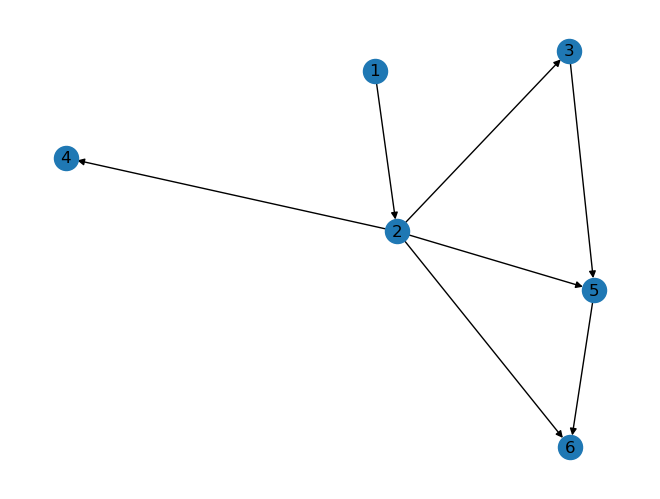

In [2]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (2,3), (2,4), (2,5), (2,6), (3,5), (5,6)])
nx.draw(G, with_labels = True)

3. _Q: explain what equation (6.25) means. simpler way to explain what the two summations mean_
    A: The equation 6.25 is:
    $$k^{in}_i = \sum^n_{j=1}A_{ij}$$
    $$k^{out}_j = \sum^n_{i=1}A_{ij}$$





## Section 6.10-11: Paths & Components

1. Write down the adjacency matrix `A`. 
$$
\begin{bmatrix}
   a & b & h & i & s \\
   c & d & h & i & s \\
   e & g & h & i & s \\
   e & g & h & i & s \\
   e & g & h & i & s 
\end{bmatrix}
$$
2. write down the adjacency matrix wtice and multiply them to get $A^2$

3. Indicate what each nonzero element of $A^2$ means.

4. Write down the paths that correspond to these nonzero elements: e.g. 1 -> 3 -> 4

5. Multiply $Ax$, $A^2x = A(Ax)$, and $A^3x = A(A(Ax))$. What do these resulting column vectors represent?

6. Do the same for $x=[0,0,1,0,0].T$ Does the observation generalize?

### Grid Network

1. Write down the degrees of the nodes. Pick a way to visualize data.
2. Briefly describe the pattern, why stops, where it does. How could you make the propagation go further. 

### Directed Graph

### E. coli Protein Network

## Section 6.12: Flows && Cut sets
1. describe these graphs in words
2. Choose n to be somewhat large 1000 and observe the computation time required on these two types of graphs
3. reason why